# Import Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [139]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Understanding

In [140]:
df.shape

(2240, 29)

In [141]:
print(f"Informations Of The Dataset :\n")
print(df.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

In [142]:
print(f"Summary Of The Dataset :")
df.describe()

Summary Of The Dataset :


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Preparation

Parsed Dt_Customer as DateTime

In [143]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i) 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Encode the categorical features into numerical form

In [144]:
df['Age'] = 2023 - df["Year_Birth"]
df['Kids'] = df['Kidhome'] + df['Teenhome']
df["Parental Status"] = np.where(df["Kids"] > 0, 1, 0)
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalPromo'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [145]:
df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"}, inplace = True)

In [146]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'Discount Purchases', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Kids', 'Parental Status', 'Expenses',
       'TotalPromo', 'TotalPurchases'],
      dtype='object')

In [147]:
df=df.drop(columns=["ID", "Year_Birth", 'Kidhome','Teenhome','AcceptedCmp1', 'AcceptedCmp2', 
                    'Z_CostContact','Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                    'Complain', 'Response'],axis=1)

In [148]:
days = []
newest = max(dates) 
for i in dates:
    duration = newest - i
    days.append(duration)
df["Customer Loyalty"] = days
df["Customer Loyalty"] = df["Customer Loyalty"].dt.days

In [149]:
df=df.drop(columns=["Dt_Customer"])

# Data Cleaning

In [150]:
#Clean missing values

df.isna().sum()

Education              0
Marital_Status         0
Income                24
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
Discount Purchases     0
Web                    0
Catalog                0
Store                  0
NumWebVisitsMonth      0
Age                    0
Kids                   0
Parental Status        0
Expenses               0
TotalPromo             0
TotalPurchases         0
Customer Loyalty       0
dtype: int64

In [151]:
df = df.dropna(subset=['Income'])

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

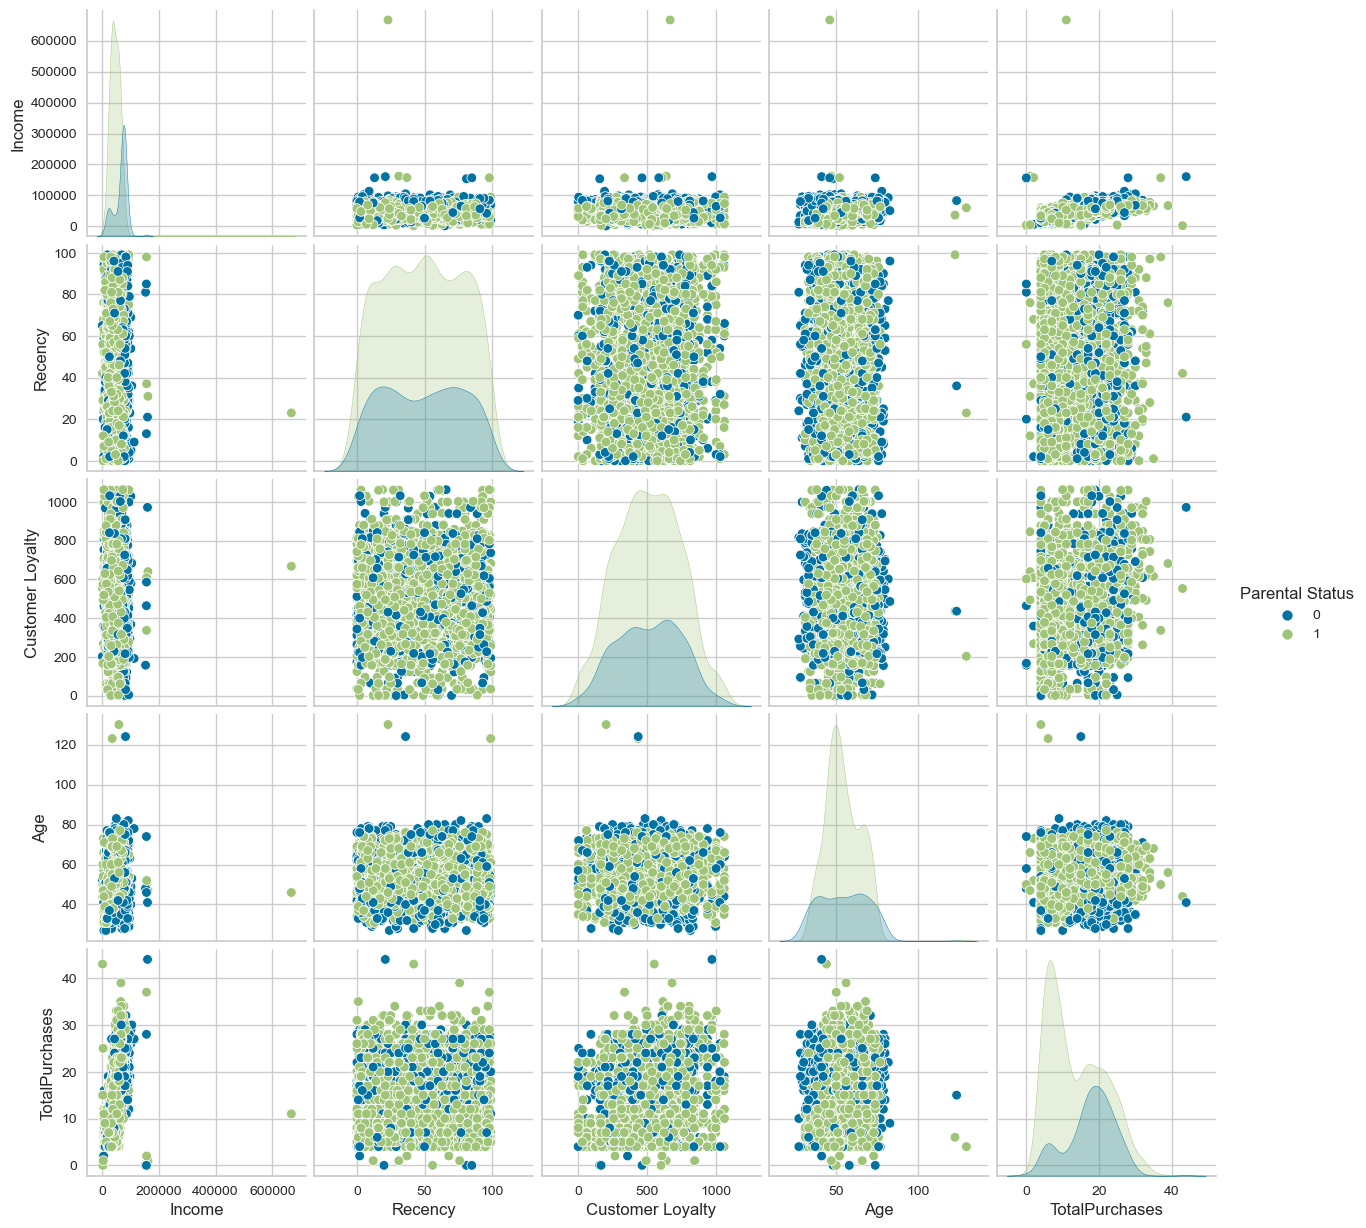

In [152]:
#Checking outliers on selection features

To_Plot = [ "Income", "Recency", "Customer Loyalty", "Age", "TotalPurchases", "Parental Status"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Parental Status")
plt.show()

Clearly, there are a few outliers in the Income and Age features. We cna delete the outliers in the data.

In [153]:
#Dropping the outliers by setting a cap on Age and income. 

df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

# Data Visualization

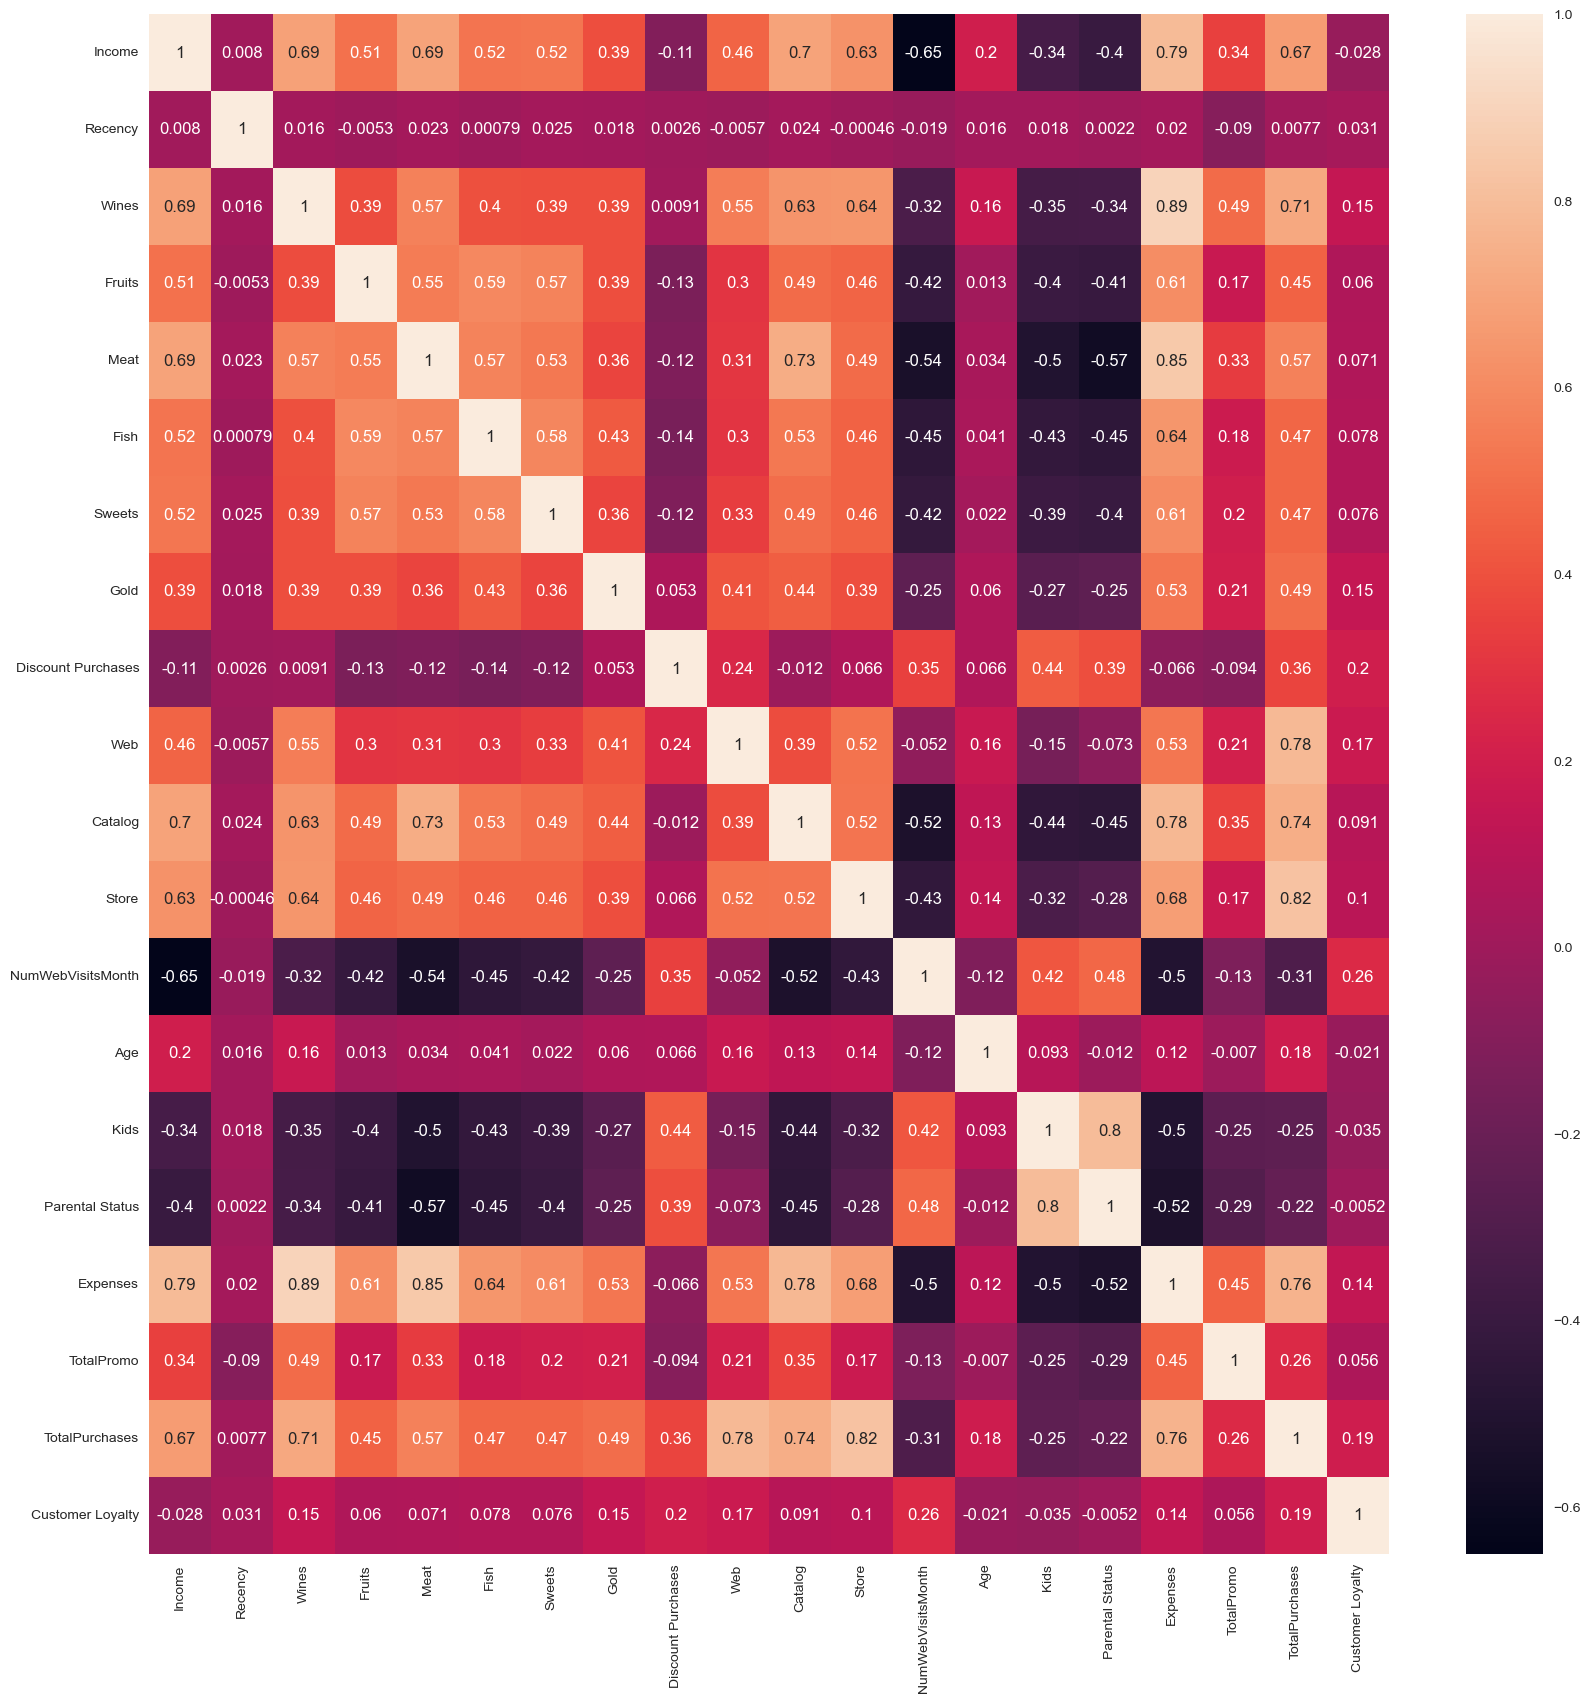

In [154]:
#Correlation Map
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

The data is quite clean and new features have been included.

In [155]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

35.5% of the customer are single whereas more 64% are in relationship.

In [156]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "gridon")
fig.show ()

More than 97% customer are from PG background. and Approx. 2% are from UG

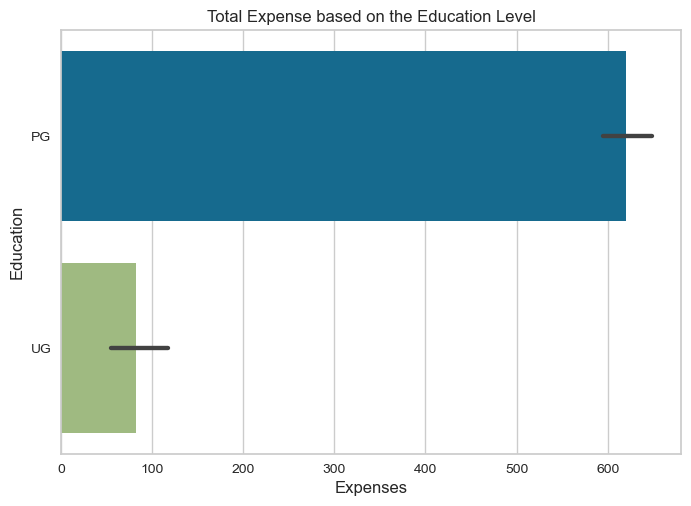

In [157]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

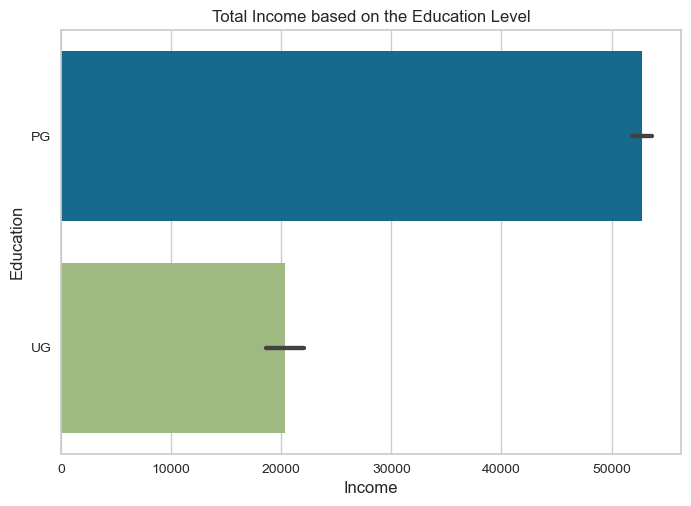

In [158]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

# Clustering

In [159]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [160]:
le = LabelEncoder()
df.Education= le.fit_transform(df.Education.values)
df.Marital_Status= le.fit_transform(df.Marital_Status.values)

In [161]:
df1 = df.copy()

In [162]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [163]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Catalog,Store,NumWebVisitsMonth,Age,Kids,Parental Status,Expenses,TotalPromo,TotalPurchases,Customer Loyalty
0,-0.158187,1.349603,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,2.503607,-0.555814,0.692181,1.018352,-1.264598,-1.581139,1.676245,0.617244,1.317945,1.973583
1,-0.158187,1.349603,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-0.571340,-1.171160,-0.132545,1.274785,1.404572,0.632456,-0.963297,-0.502808,-1.159273,-1.665144
2,-0.158187,-0.740959,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.229679,1.290224,-0.544908,0.334530,-1.264598,-1.581139,0.280110,-0.502808,0.796425,-0.172664
3,-0.158187,-0.740959,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.913000,-0.555814,0.279818,-1.289547,0.069987,0.632456,-0.920135,-0.502808,-0.898513,-1.923210
4,-0.158187,-0.740959,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.111982,0.059532,-0.132545,-1.033114,0.069987,0.632456,-0.307562,-0.502808,0.535666,-0.822130


PCA

In [164]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_features_df)
PCA_df = pd.DataFrame(pca.transform(scaled_features_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.284887e-17,2.867005,-5.060299,-2.663151,-0.770161,2.524245,8.077873
col2,2212.0,-1.284887e-17,1.552749,-4.056439,-1.100276,-0.231873,1.017010,6.222037
col3,2212.0,-8.030546e-18,1.172907,-2.873039,-0.813797,-0.068768,0.657661,5.603290


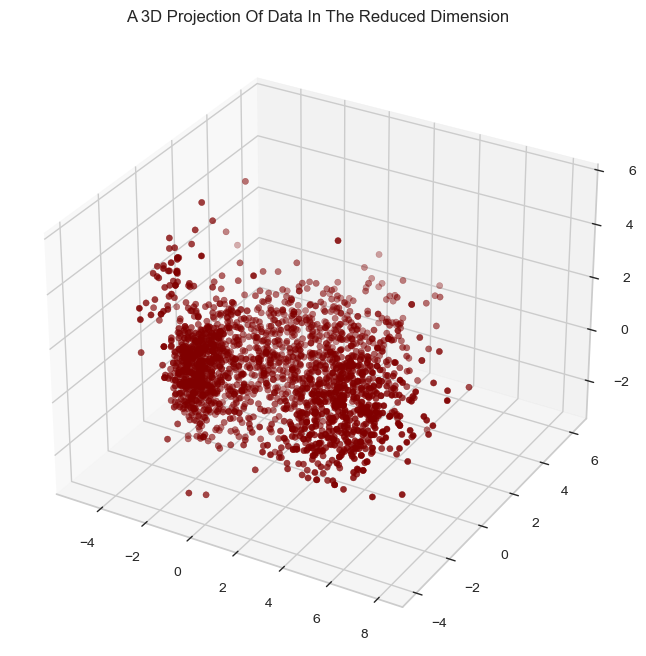

In [166]:
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Clustering

Elbow Method:


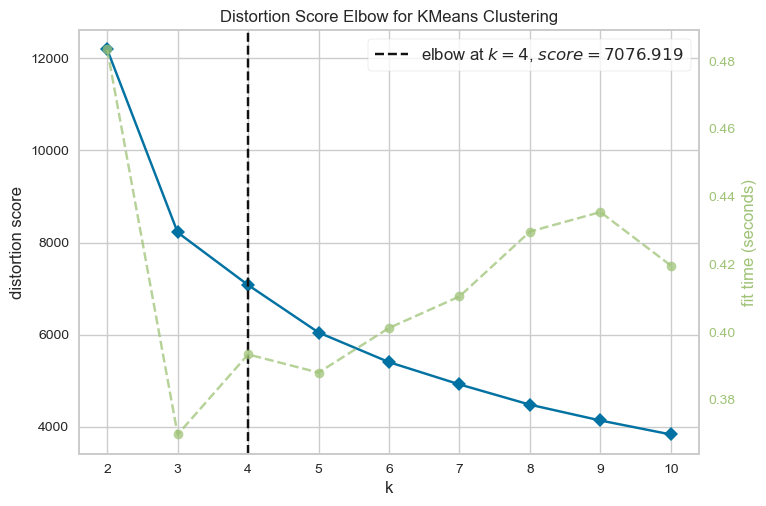

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [168]:
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [170]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df1["Clusters"]= yhat_AC

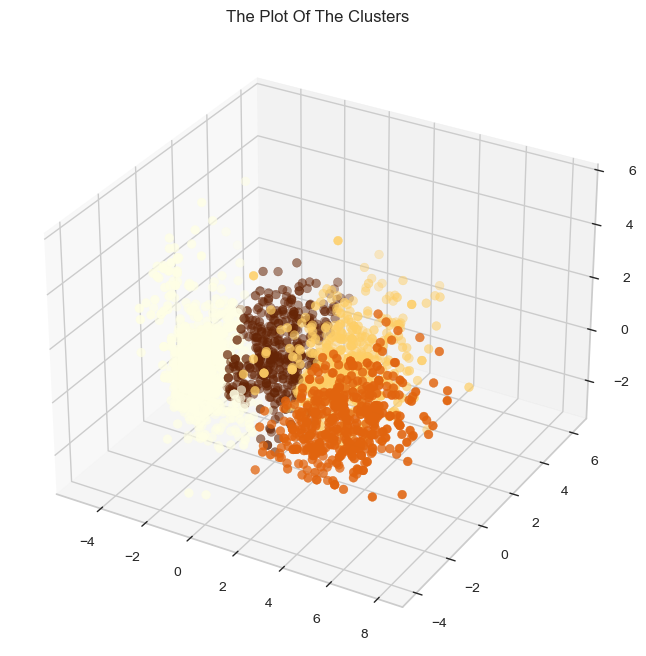

In [174]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap='YlOrBr')
ax.set_title("The Plot Of The Clusters")
plt.show()

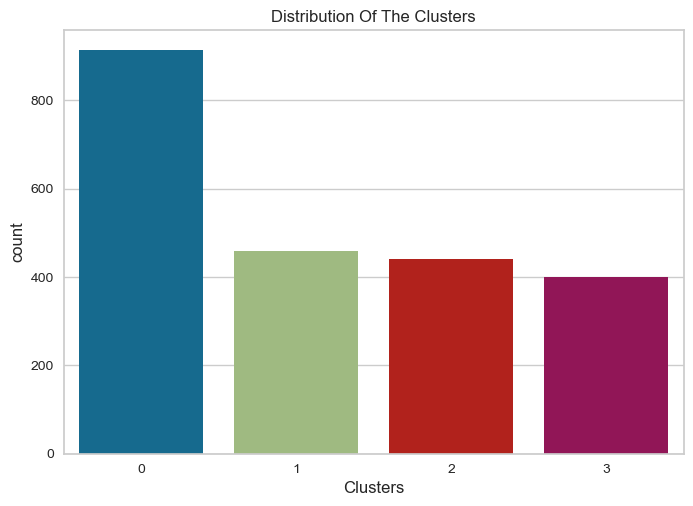

In [175]:
pl = sns.countplot(x=df1["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

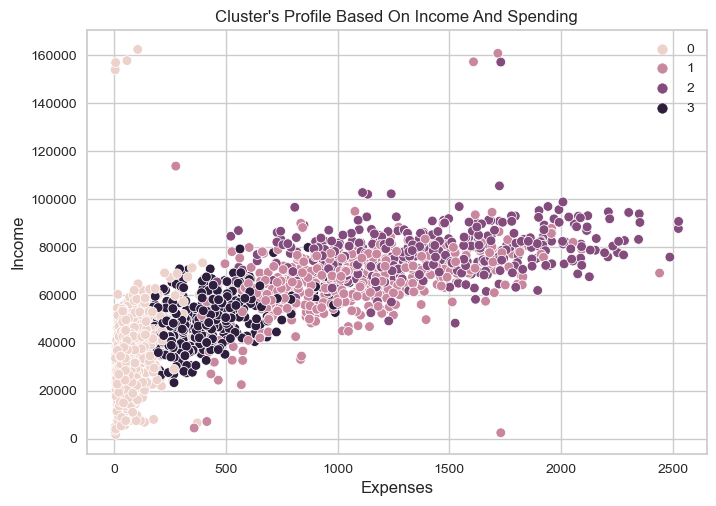

In [178]:
pl = sns.scatterplot(data = df1,x=df1["Expenses"], y=df1["Income"],hue=df1["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [184]:
print("Group 0: high spending & average income")
print("Group 1: high spending & high income")
print("Group 2: low spending & low income")
print("Group 3: high spending & low income")

Group 0: high spending & average income
Group 1: high spending & high income
Group 2: low spending & low income
Group 3: high spending & low income


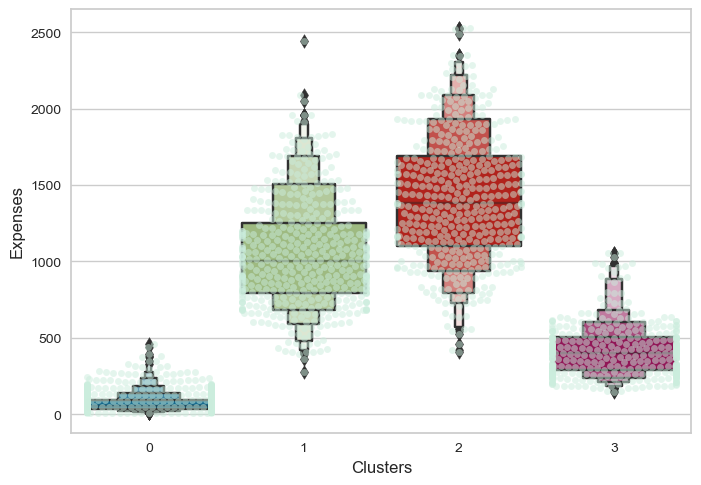

In [179]:
plt.figure()
pl=sns.swarmplot(x=df1["Clusters"], y=df1["Expenses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df1["Clusters"], y=df1["Expenses"])
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

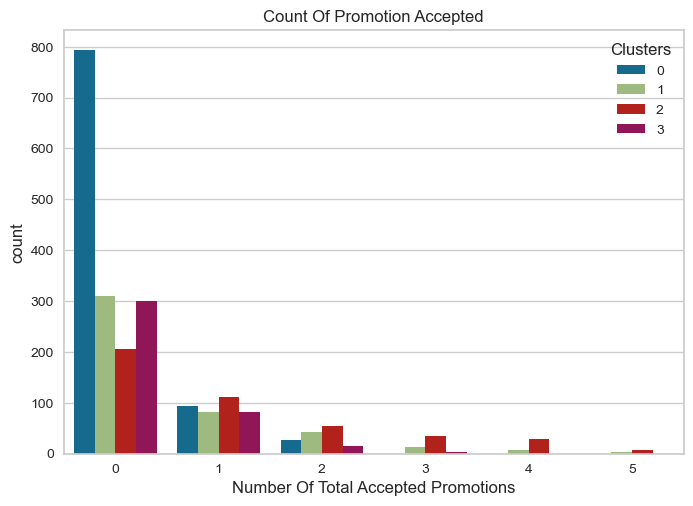

In [187]:
plt.figure()
pl = sns.countplot(x=df1["TotalPromo"],hue=df1["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. It seems a very few participants overall. Moreover, no one part take in all 5 of them. 

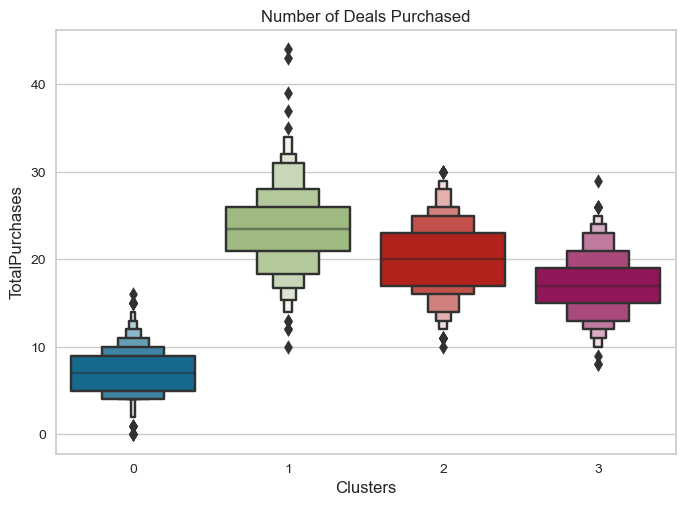

In [189]:
#Plotting the number of purchased
plt.figure()
pl=sns.boxenplot(y=df1["TotalPurchases"],x=df1["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly